# examine the different CRS activities 

Below are the CRS activities in the dataset. In bold are the ones that are important based on Lidia's domain expertise.

1)PUBLIC INFORMATION (Called 300 type activities)

- Activity 310 (Elevation Certificates) - Maintaining construction certificates and making them available to the public

- Activity 320 (Map Information Service) - Providing Flood Insurance Rate Maps (FIRMS) and other map information, and publicizing that service.

- Activity 340 (Hazard Disclosure) - Real estate agents’ advising potential purchasers of floodprone property about the flood hazard, and local regulations requiring disclosure of the hazard

- **Activity 350 (Flood Protection Information) - Maintaining a community public library and/or website that contains flood-related information**

- **Activity 360 (Flood Protection Assistance) - Advising property owners and renters about how to protect buildings from flooding and publicizing that service**

- Activity 370 (Flood Insurance Promotion) - Assessing flood insurance coverage in the community and implementing a plan to promote flood insurance

MAPPING & REGULATIONS (Called 400 type activities)

- Activity 410 (Floodplain Mapping) - Developing regulatory maps for areas not mapped by FEMA or flood mapping based on future conditions, detailed topography, or other standards

- **Activity 420 (Open Space Preservation) - Keeping floodprone land free of development**

- Activity 430 (Higher Regulatory Standards) - Regulations that exceed the NFIP’s minimum criteria for floodplain management

- Activity 440 (Flood Data Maintenance) - Gathering and/or maintaining more accessible, useful, and/or accurate floodplain data for regulation, insurance rating, hazard disclosure, and property appraisals

- **Activity 450 (Stormwater Management) - Watershed planning and regulations that prevent future development from increasing flood hazards or diminishing water quality**

FLOOD DAMAGE REDUCTION (Called 500 type activities)

- Activity 510 (Floodplain Management Planning) - Adoption of flood hazard mitigation and/or natural functions plans using the CRS planning process, and/or conducting repetitive loss area analyses

- **Activity 520 (Acquisition and Relocation) - Acquiring insurable buildings and relocating them out of the floodplain, and leaving the property as open space**

- **Activity 530 (Flood Protection) - Protecting buildings from flood damage by floodproofing, elevation, or minor structural projects**

- **Activity 540 (Drainage System Maintenance) - Annual inspections of channels and retention basins, and maintenance of the drainage system’s flood-carrying and storage capacity**

WARNING AND RESPONSE (Called 600 type activities)

- **Activity 610 (Flood Warning and Response) - Timely warning of flood threats and coordinating flood response activities.**

- **Activity 620 (Levees) - Annual levee inspection programs and plans to respond to floods caused by levee failure**

- **Activity 630 (Dams) - State dam safety programs and plans to respond to flooding caused by dam failure.**

In [1]:
import os
import numpy as np 
from astropy.table import join as aJ
from astropy.table import Table as aT

In [2]:
import corner as DFM
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

## read NOAH2 dataset of CRS participants

In [3]:
dat_dir = '/Users/chahah/data/noah/noah2'
fema = aT.read(os.path.join(dat_dir, 'noah2.participants.v0.0.csv'))

In [6]:
activities = [] 
for col in fema.colnames: 
    if 's_c' in col and '_avg' not in col:
        activities.append(col[2:])
len(activities)

19

In [16]:
for activity in activities:
    print('%s, %.2f, %i' % (activity, np.mean(fema[activity] > 0), np.sum(fema[activity] > 0)))

c310, 0.99, 197013
c320, 0.95, 187399
c330, 0.99, 195775
c340, 0.94, 186847
c350, 0.96, 190678
c360, 0.41, 81443
c370, 0.25, 48965
c410, 0.78, 154634
c420, 0.94, 186781
c430, 0.99, 195151
c440, 0.99, 195336
c450, 0.96, 190227
c510, 0.95, 187645
c520, 0.65, 128920
c530, 0.11, 22130
c540, 0.73, 144340
c610, 0.24, 47438
c620, 0.00, 151
c630, 0.29, 57428


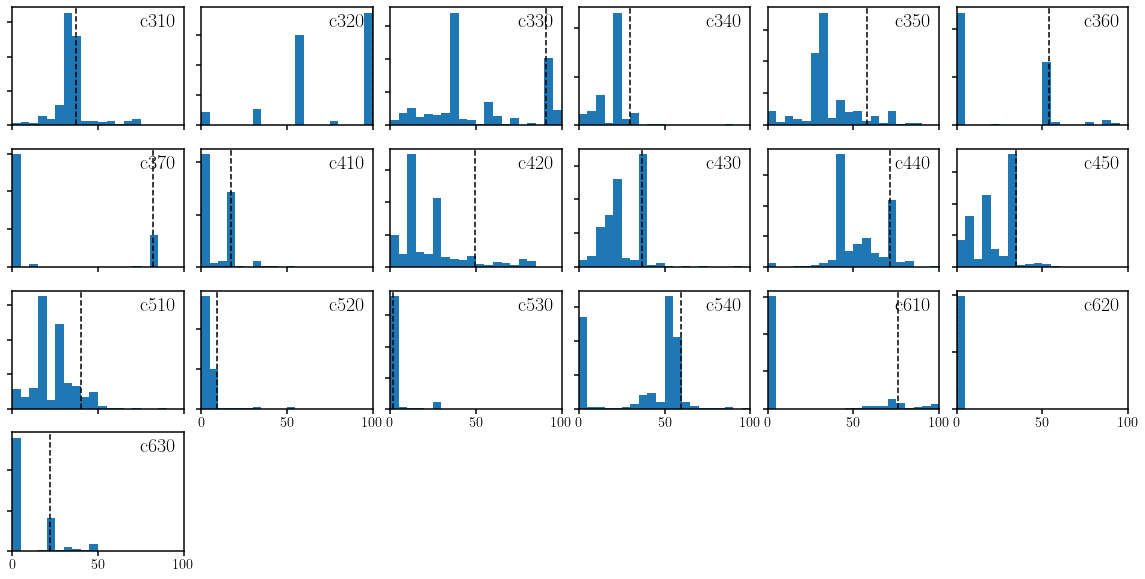

In [49]:
fig = plt.figure(figsize=(20,10))
for i, activity in enumerate(activities): 
    sub = fig.add_subplot(4,6,i+1)
    _ = sub.hist(fema['s_'+activity], range=(0., 100), bins=20)
    sub.axvline(np.quantile(fema['s_'+activity], [0.9]), color='k', linestyle='--')
    sub.text(0.95, 0.95, activity, transform=sub.transAxes, ha='right', va='top', fontsize=20)
    sub.set_xlim(0., 100.)
    sub.set_yticklabels([])
    if i < 13: sub.set_xticklabels([])
fig.subplots_adjust(wspace=0.1)
plt.show()

## examining `c620`
activity `c620` has very few communities that have implemented it

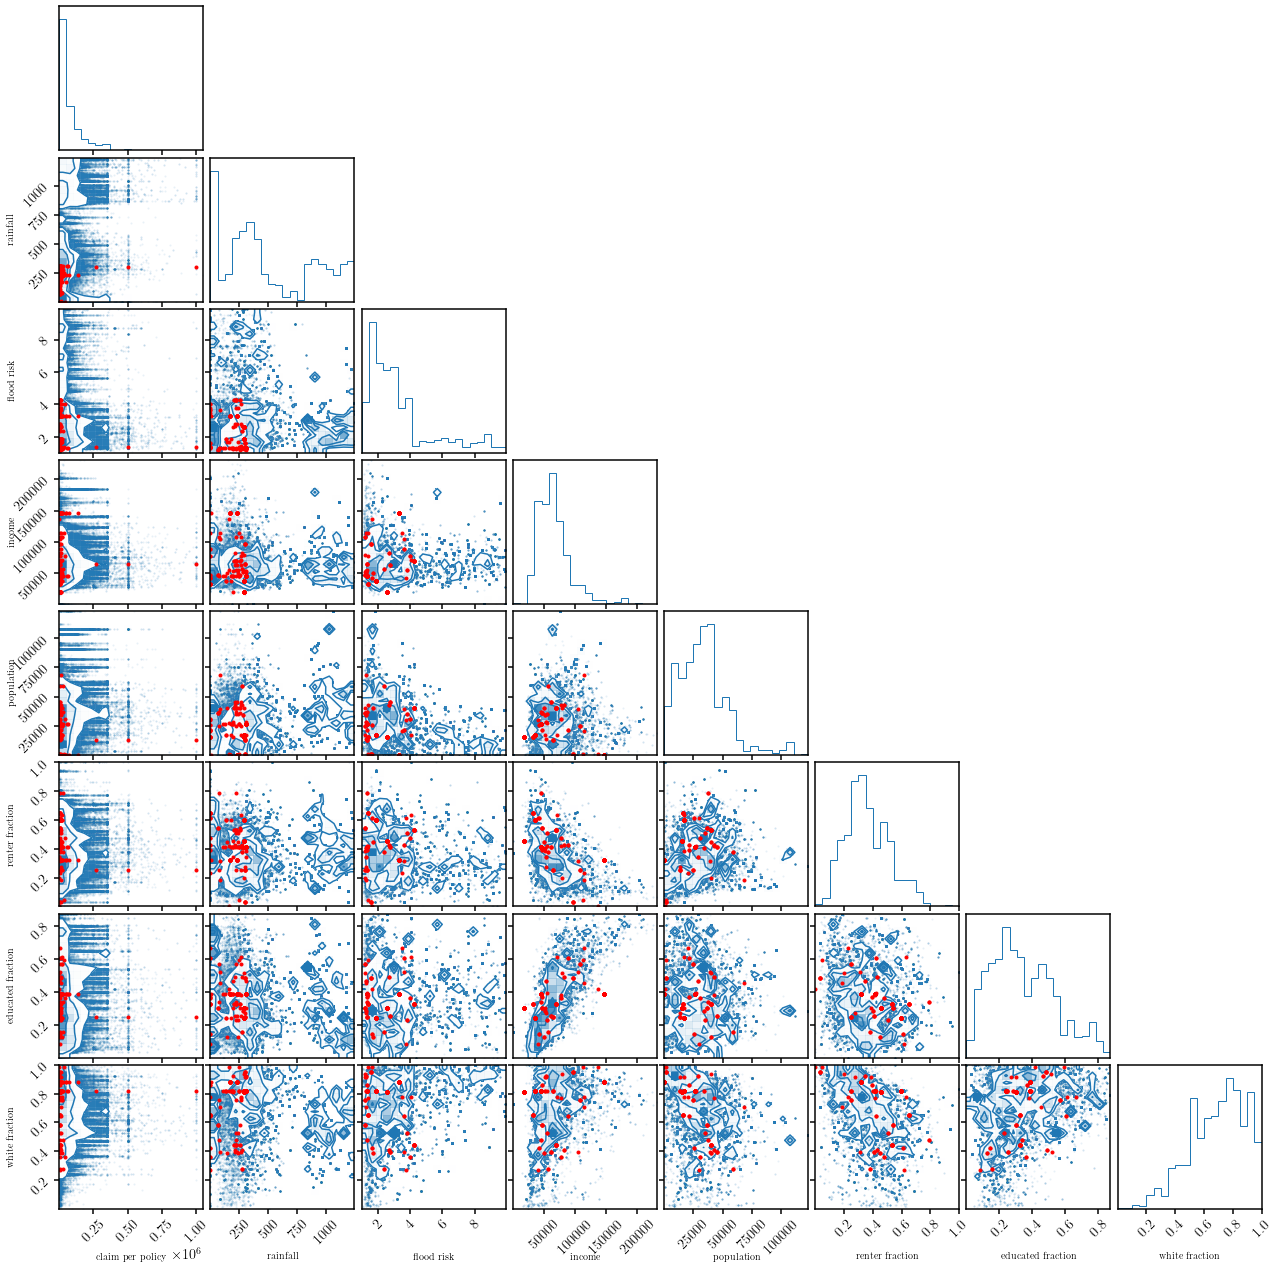

In [41]:
columns = ['amountPaidOnTotalClaim_per_policy', 'mean_rainfall', 'avg_risk_score_all', 
           'median_household_income', 'population', 'renter_fraction', 'educated_fraction', 'white_fraction'] 
labels = ['claim per policy', 'rainfall', 'flood risk', 'income', 
          'population', 'renter fraction', 'educated fraction', 'white fraction']

_data = np.array([np.array(fema[col]) for col in columns])
fig = DFM.corner(_data.T, color='C0', labels=labels)
DFM.overplot_points(fig, _data.T[fema['s_c620'] != 0], color='r')

[Text(0, 0.0, ''),
 Text(0, 0.1, ''),
 Text(0, 0.2, ''),
 Text(0, 0.30000000000000004, ''),
 Text(0, 0.4, ''),
 Text(0, 0.5, ''),
 Text(0, 0.6000000000000001, ''),
 Text(0, 0.7000000000000001, ''),
 Text(0, 0.8, '')]

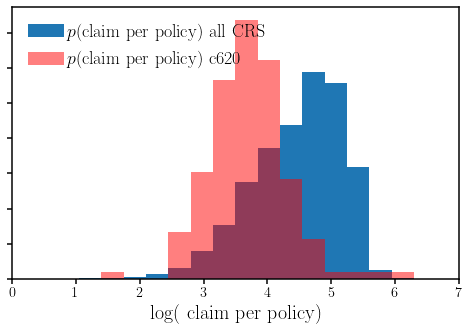

In [33]:
fig = plt.figure(figsize=(8,5))
sub = fig.add_subplot(111)
_ = sub.hist(np.log10(fema['amountPaidOnTotalClaim_per_policy']), 
             range=(0., 7), bins=20, color='C0', density=True, label='$p($claim per policy$)$ all CRS')
_ = sub.hist(np.log10(fema['amountPaidOnTotalClaim_per_policy'][fema['s_c620'] != 0]), 
             range=(0., 7), bins=20, color='r', alpha=0.5, density=True, label='$p($claim per policy$)$ c620')
sub.legend(loc='upper left', fontsize=18, handletextpad=0.1)
sub.set_xlim(0., 7)
sub.set_xlabel(r'$\log($ claim per policy)', fontsize=20)
sub.set_yticklabels([])

In [46]:
print('median claim per policy for communities with c620 = $%.2f' % (np.median(fema['amountPaidOnTotalClaim_per_policy'][fema['s_c620'] != 0])))
print('median claim per policy for the rest of the communities = $%.2f' % (np.median(fema['amountPaidOnTotalClaim_per_policy'][~(fema['s_c620'] != 0)])))

print('crudely, this is a $%.2f effect' % (np.median(fema['amountPaidOnTotalClaim_per_policy'][~(fema['s_c620'] != 0)]) - (np.median(fema['amountPaidOnTotalClaim_per_policy'][fema['s_c620'] != 0]))))

median claim per policy for communities with c620 = $4913.59
median claim per policy for the rest of the communities = $39390.62
crudely, this is a $34477.03 effect


Activity `c620`, crudely, has a very significant effect on flood losses. However, there are only ~150 communities with any level of participation, so we'll have to remove them from sample.

In [47]:
fema = fema[~(fema['s_c620'] != 0)]

In [48]:
len(fema)

197853

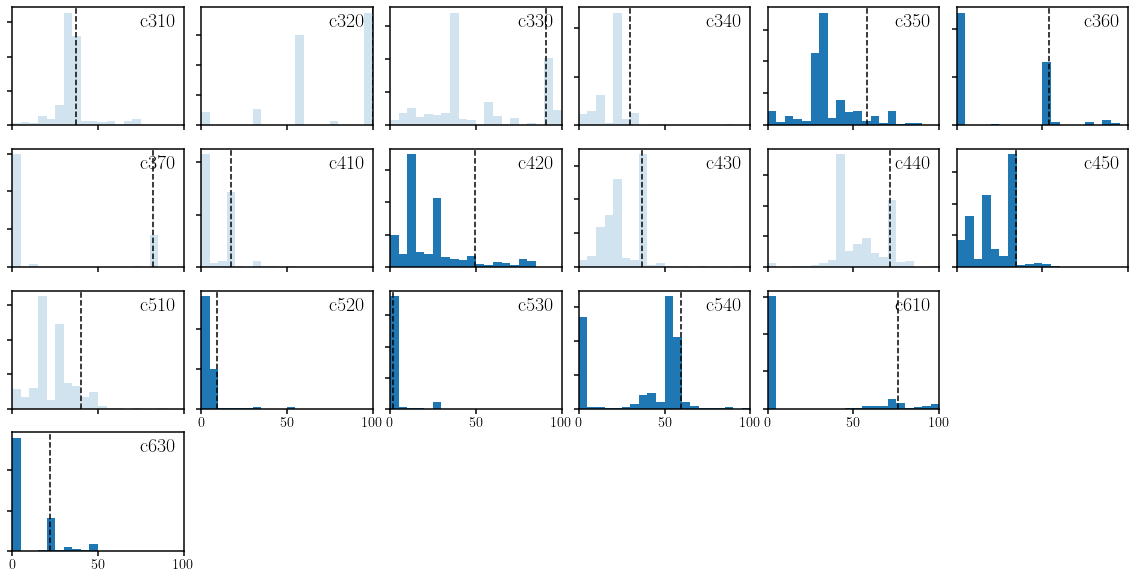

In [55]:
fig = plt.figure(figsize=(20,10))
for i, activity in enumerate(activities): 
    if activity == 'c620': continue
        
    sub = fig.add_subplot(4,6,i+1)
    
    if activity not in ['c350', 'c360', 'c420', 'c450', 'c520', 'c530', 'c540', 'c610', 'c630']: 
        _ = sub.hist(fema['s_'+activity], range=(0., 100), bins=20, alpha=0.2)
    else:         
        _ = sub.hist(fema['s_'+activity], range=(0., 100), bins=20)
    sub.axvline(np.quantile(fema['s_'+activity], [0.9]), color='k', linestyle='--')
    sub.text(0.95, 0.95, activity, transform=sub.transAxes, ha='right', va='top', fontsize=20)
    sub.set_xlim(0., 100.)
    sub.set_yticklabels([])
    if i < 13: sub.set_xticklabels([])
fig.subplots_adjust(wspace=0.1)
plt.show()

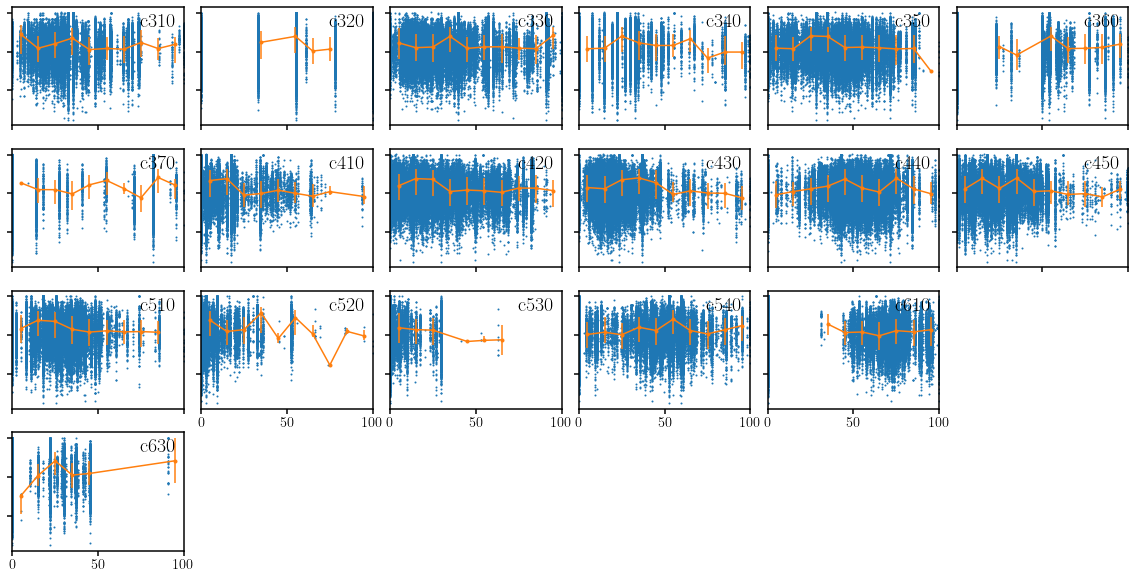

In [64]:
fig = plt.figure(figsize=(20,10))
for i, activity in enumerate(activities): 
    if activity == 'c620': continue
        
    sub = fig.add_subplot(4,6,i+1)
    sub.scatter(fema['s_'+activity], np.log10(fema['amountPaidOnTotalClaim_per_policy']), s=1, c='C0')
    
    _x, med, std = [], [], []
    for _i in range(10): 
        inbin = (fema['s_'+activity] > _i*10) & (fema['s_'+activity] < (_i+1)*10)
        if np.sum(inbin) == 0: continue
        _x.append(_i*10+5)
        q0, q1, q2 = np.quantile(np.log10(fema['amountPaidOnTotalClaim_per_policy'])[inbin], [0.16, 0.5, 0.84])
        med.append(q1)
        std.append([q0, q2])
        
    sub.errorbar(np.array(_x), np.array(med), 
                 yerr=[np.array(med)-np.array(std)[:,0], np.array(std)[:,1] - np.array(med)], 
                 fmt='.C1')
    sub.plot(np.array(_x), np.array(med), c='C1')
    
    sub.text(0.95, 0.95, activity, transform=sub.transAxes, ha='right', va='top', fontsize=20)
    sub.set_xlim(0., 100.)
    sub.set_yticklabels([])
    if i < 13: sub.set_xticklabels([])
fig.subplots_adjust(wspace=0.1)
plt.show()